<a href="https://colab.research.google.com/github/SarahSouzaPontes/banvic_data/blob/main/BANCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
import pandas as pd

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para os arquivos no Google Drive
caminho_base = '/content/data'

# Carregar os datasets
transacoes = pd.read_csv(caminho_base + '/transacoes.csv')
propostas_credito = pd.read_csv(caminho_base + '/propostas_credito.csv')
contas = pd.read_csv(caminho_base + '/contas.csv')
colaboradores = pd.read_csv(caminho_base + '/colaboradores.csv')
colaborador_agencia = pd.read_csv(caminho_base + '/colaborador_agencia.csv')
clientes = pd.read_csv(caminho_base + '/clientes.csv')
agencias = pd.read_csv(caminho_base + '/agencias.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Imprimir as colunas dos datasets
print("Colunas do dataset 'transacoes':")
print(transacoes.columns)

print("\nColunas do dataset 'propostas_credito':")
print(propostas_credito.columns)

print("\nColunas do dataset 'contas':")
print(contas.columns)

print("\nColunas do dataset 'colaboradores':")
print(colaboradores.columns)

print("\nColunas do dataset 'colaborador_agencia':")
print(colaborador_agencia.columns)

print("\nColunas do dataset 'clientes':")
print(clientes.columns)

print("\nColunas do dataset 'agencias':")
print(agencias.columns)


Colunas do dataset 'transacoes':
Index(['cod_transacao', 'num_conta', 'data_transacao', 'nome_transacao',
       'valor_transacao'],
      dtype='object')

Colunas do dataset 'propostas_credito':
Index(['cod_proposta', 'cod_cliente', 'cod_colaborador',
       'data_entrada_proposta', 'taxa_juros_mensal', 'valor_proposta',
       'valor_financiamento', 'valor_entrada', 'valor_prestacao',
       'quantidade_parcelas', 'carencia', 'status_proposta'],
      dtype='object')

Colunas do dataset 'contas':
Index(['num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador',
       'tipo_conta', 'data_abertura', 'saldo_total', 'saldo_disponivel',
       'data_ultimo_lancamento'],
      dtype='object')

Colunas do dataset 'colaboradores':
Index(['cod_colaborador', 'primeiro_nome', 'ultimo_nome', 'email', 'cpf',
       'data_nascimento', 'endereco', 'cep'],
      dtype='object')

Colunas do dataset 'colaborador_agencia':
Index(['cod_colaborador', 'cod_agencia'], dtype='object')

Colunas do datase

In [6]:
# 1. Join entre 'transacoes' e 'contas' usando a coluna 'num_conta'
transacoes_contas = pd.merge(transacoes, contas, on='num_conta', how='inner')

# 2. Join com 'colaboradores' usando a coluna 'cod_colaborador'
transacoes_contas_colaboradores = pd.merge(transacoes_contas, colaboradores, on='cod_colaborador', how='inner')

# 3. Continuar realizando joins com os datasets restantes
# Exemplo: Join com 'clientes' usando a coluna 'cod_cliente'
transacoes_contas_colaboradores_clientes = pd.merge(transacoes_contas_colaboradores, clientes, on='cod_cliente', how='inner')

# Exemplo: Join com 'propostas_credito' usando a coluna 'cod_cliente'
final_data = pd.merge(transacoes_contas_colaboradores_clientes, propostas_credito, on='cod_cliente', how='inner')

# Continue com os joins necessários, conforme sua lógica de integração de dados.

# Visualizar o DataFrame resultante
print(final_data.head())


   cod_transacao  num_conta           data_transacao nome_transacao  \
0           3100        256  2020-05-22 03:15:21 UTC          Saque   
1          28405        256  2021-06-29 11:52:38 UTC          Saque   
2           3190        256  2020-06-06 02:06:41 UTC  Compra Débito   
3           4466        256  2020-06-06 04:16:53 UTC  Compra Débito   
4           8455        256  2020-06-06 11:27:06 UTC  Compra Débito   

   valor_transacao  cod_cliente  cod_agencia  cod_colaborador_x tipo_conta  \
0          -130.00          256            7                 84         PF   
1          -255.00          256            7                 84         PF   
2           -31.12          256            7                 84         PF   
3           -33.74          256            7                 84         PF   
4            -7.52          256            7                 84         PF   

             data_abertura  ...  cod_colaborador_y    data_entrada_proposta  \
0  2020-04-28 16:46:00 UT

In [97]:
final_data.to_csv('/content/data/final_data.csv', index=False)


In [9]:
# Imprimir as primeiras 20 linhas em formato de tabela

print(final_data.head(20).to_string(index=False))

 cod_transacao  num_conta          data_transacao nome_transacao  valor_transacao  cod_cliente  cod_agencia  cod_colaborador_x tipo_conta           data_abertura  saldo_total  saldo_disponivel  data_ultimo_lancamento primeiro_nome_x ultimo_nome_x             email_x            cpf data_nascimento_x                                     endereco_x     cep_x primeiro_nome_y ultimo_nome_y                   email_y tipo_cliente           data_inclusao        cpfcnpj data_nascimento_y                                                      endereco_y     cep_y  cod_proposta  cod_colaborador_y   data_entrada_proposta  taxa_juros_mensal  valor_proposta  valor_financiamento  valor_entrada  valor_prestacao  quantidade_parcelas  carencia status_proposta
          3100        256 2020-05-22 03:15:21 UTC          Saque          -130.00          256            7                 84         PF 2020-04-28 16:46:00 UTC         3.88             494.7 2022-11-02 17:44:43 UTC          Pietro         Souza diog

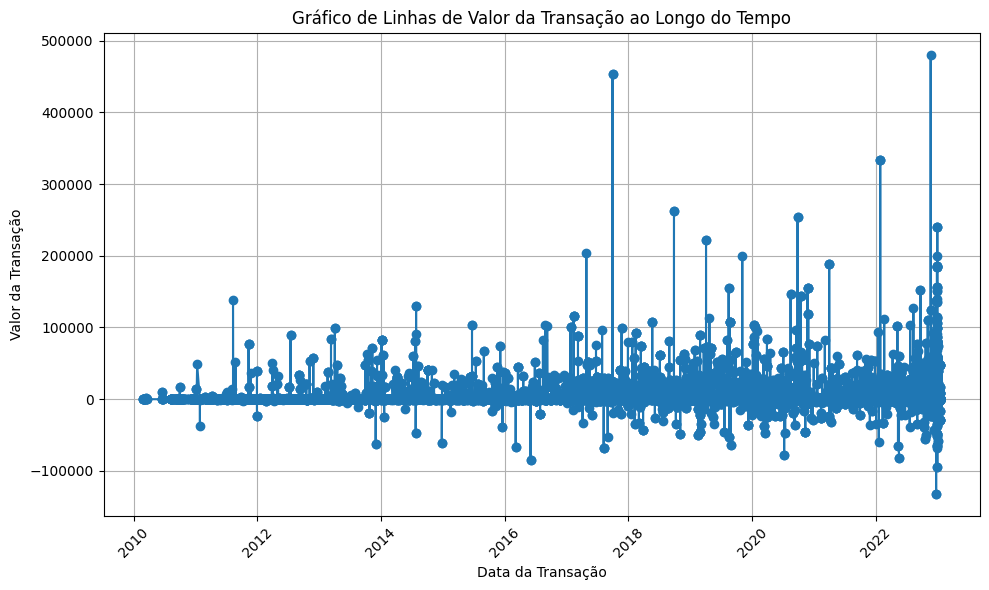

In [40]:
import matplotlib.pyplot as plt

# Converter a coluna 'data_transacao' para o tipo datetime
final_data['data_transacao'] = pd.to_datetime(final_data['data_transacao'])

# Ordenar o DataFrame pelo 'data_transacao'
final_data = final_data.sort_values('data_transacao')

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(final_data['data_transacao'], final_data['valor_transacao'], marker='o', linestyle='-')

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas de Valor da Transação ao Longo do Tempo')
plt.xlabel('Data da Transação')
plt.ylabel('Valor da Transação')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()



 Qual é o total de transações financeiras realizadas em um determinado período de tempo?

---

 Quais são os tipos mais frequentes de transações realizadas pelos clientes?

---

 Qual é o saldo médio das contas dos clientes em cada agência?

---

 Quais são os colaboradores que mais realizam transações financeiras e qual é o valor total movimentado por eles?

---

 Qual é a distribuição dos tipos de contas entre os clientes?

---

 Qual é a taxa média de juros mensal aplicada nas propostas de crédito aprovadas?

---

 Qual é o valor total financiado através das propostas de crédito?

---

 Quais são os principais produtos financeiros oferecidos aos clientes?

---

 Qual é a distribuição das propostas de crédito por categoria de cliente?




In [10]:
# Calcular o total de transações financeiras
total_transacoes = final_data.shape[0]

# Interpretação
print("Total de transações financeiras realizadas:", total_transacoes)


Total de transações financeiras realizadas: 143382


In [11]:
# Contar o número de ocorrências de cada tipo de transação
tipos_transacoes = final_data['nome_transacao'].value_counts()

# Interpretação
print("Tipos mais frequentes de transações:")
print(tipos_transacoes)


Tipos mais frequentes de transações:
Compra Crédito                      49390
Compra Débito                       35318
Pix - Realizado                     26243
Pix - Recebido                      10604
Depósito em espécie                  9775
Saque                                5597
TED - Recebido                       1919
Pagamento de boleto                   902
Transferência entre CC - Crédito      861
Estorno de Debito                     824
DOC - Recebido                        766
Transferência entre CC - Débito       595
TED - Realizado                       239
DOC - Realizado                       177
Pix Saque                             172
Name: nome_transacao, dtype: int64


In [12]:
# Calcular o número de transações realizadas por cada colaborador
transacoes_por_colaborador = final_data['cod_colaborador_x'].value_counts()

# Calcular o valor total movimentado por cada colaborador
valor_total_por_colaborador = final_data.groupby('cod_colaborador_x')['valor_transacao'].sum()

# Identificar o colaborador com o maior número de transações
colaborador_max_transacoes = transacoes_por_colaborador.idxmax()
num_transacoes_max = transacoes_por_colaborador.max()

# Identificar o colaborador com o maior valor total movimentado
colaborador_max_valor = valor_total_por_colaborador.idxmax()
valor_total_max = valor_total_por_colaborador.max()

# Interpretação
print("Colaborador com o maior número de transações:", colaborador_max_transacoes, "com", num_transacoes_max, "transações")
print("Colaborador com o maior valor total movimentado:", colaborador_max_valor, "com valor total de R$", valor_total_max)


Colaborador com o maior número de transações: 26 com 13940 transações
Colaborador com o maior valor total movimentado: 64 com valor total de R$ 4108995.05


In [13]:
# Calcular o número de transações realizadas por cada colaborador
transacoes_por_colaborador = final_data['cod_colaborador_x'].value_counts()

# Calcular o valor total movimentado por cada colaborador
valor_total_por_colaborador = final_data.groupby('cod_colaborador_x')['valor_transacao'].sum()

# Identificar o colaborador com o maior número de transações
colaborador_max_transacoes = transacoes_por_colaborador.idxmax()
num_transacoes_max = transacoes_por_colaborador.max()

# Identificar o colaborador com o maior valor total movimentado
colaborador_max_valor = valor_total_por_colaborador.idxmax()
valor_total_max = valor_total_por_colaborador.max()

# Interpretação
print("Colaborador com o maior número de transações:", colaborador_max_transacoes, "com", num_transacoes_max, "transações")
print("Colaborador com o maior valor total movimentado:", colaborador_max_valor, "com valor total de R$", valor_total_max)


Colaborador com o maior número de transações: 26 com 13940 transações
Colaborador com o maior valor total movimentado: 64 com valor total de R$ 4108995.05


In [14]:
# Calcular o total de propostas de crédito recebidas
total_propostas = final_data.shape[0]

# Interpretação
print("Total de propostas de crédito recebidas:", total_propostas)


Total de propostas de crédito recebidas: 143382


In [15]:
# Calcular a taxa média de juros mensal aplicada nas propostas de crédito aprovadas
taxa_media_juros = final_data[final_data['status_proposta'] == 'Aprovada']['taxa_juros_mensal'].mean()

# Interpretação
print("Taxa média de juros mensal aplicada nas propostas de crédito aprovadas:", taxa_media_juros)


Taxa média de juros mensal aplicada nas propostas de crédito aprovadas: 0.016824111123192344


In [16]:
# Calcular o valor total financiado através das propostas de crédito
valor_total_financiado = final_data[final_data['status_proposta'] == 'Aprovada']['valor_financiamento'].sum()

# Interpretação
print("Valor total financiado através das propostas de crédito:", valor_total_financiado)


Valor total financiado através das propostas de crédito: 4636536199.69


In [17]:
# Calcular o valor total financiado através das propostas de crédito
valor_total_financiado = final_data[final_data['status_proposta'] == 'Aprovada']['valor_financiamento'].sum()

# Interpretação
print("Valor total financiado através das propostas de crédito:", valor_total_financiado)


Valor total financiado através das propostas de crédito: 4636536199.69


In [18]:
# Identificar os principais produtos financeiros oferecidos
produtos_oferecidos = final_data['nome_transacao'].unique()

# Interpretação
print("Principais produtos financeiros oferecidos aos clientes:")
print(produtos_oferecidos)


Principais produtos financeiros oferecidos aos clientes:
['Saque' 'Compra Débito' 'Pix - Recebido' 'Compra Crédito'
 'Pix - Realizado' 'Estorno de Debito' 'Depósito em espécie'
 'Transferência entre CC - Crédito' 'DOC - Recebido' 'TED - Recebido'
 'TED - Realizado' 'Pagamento de boleto' 'Transferência entre CC - Débito'
 'DOC - Realizado' 'Pix Saque']


In [19]:
# Contar o número de propostas de crédito por categoria de cliente
distribuicao_propostas_por_cliente = final_data[final_data['status_proposta'] == 'Aprovada']['tipo_cliente'].value_counts()

# Interpretação
print("Distribuição das propostas de crédito por categoria de cliente:")
print(distribuicao_propostas_por_cliente)


Distribuição das propostas de crédito por categoria de cliente:
PF    36788
Name: tipo_cliente, dtype: int64


In [20]:
# Verificar valores nulos em 'transacoes'
valores_nulos_transacoes = transacoes.isnull().sum()
print("Valores nulos em 'transacoes':")
print(valores_nulos_transacoes)

# Verificar valores nulos em 'propostas_credito'
valores_nulos_propostas_credito = propostas_credito.isnull().sum()
print("\nValores nulos em 'propostas_credito':")
print(valores_nulos_propostas_credito)

# Verificar valores nulos em 'contas'
valores_nulos_contas = contas.isnull().sum()
print("\nValores nulos em 'contas':")
print(valores_nulos_contas)

# Verificar valores nulos em 'colaboradores'
valores_nulos_colaboradores = colaboradores.isnull().sum()
print("\nValores nulos em 'colaboradores':")
print(valores_nulos_colaboradores)

# Verificar valores nulos em 'colaborador_agencia'
valores_nulos_colaborador_agencia = colaborador_agencia.isnull().sum()
print("\nValores nulos em 'colaborador_agencia':")
print(valores_nulos_colaborador_agencia)

# Verificar valores nulos em 'clientes'
valores_nulos_clientes = clientes.isnull().sum()
print("\nValores nulos em 'clientes':")
print(valores_nulos_clientes)

# Verificar valores nulos em 'agencias'
valores_nulos_agencias = agencias.isnull().sum()
print("\nValores nulos em 'agencias':")
print(valores_nulos_agencias)


Valores nulos em 'transacoes':
cod_transacao      0
num_conta          0
data_transacao     0
nome_transacao     0
valor_transacao    0
dtype: int64

Valores nulos em 'propostas_credito':
cod_proposta             0
cod_cliente              0
cod_colaborador          0
data_entrada_proposta    0
taxa_juros_mensal        0
valor_proposta           0
valor_financiamento      0
valor_entrada            0
valor_prestacao          0
quantidade_parcelas      0
carencia                 0
status_proposta          0
dtype: int64

Valores nulos em 'contas':
num_conta                 0
cod_cliente               0
cod_agencia               0
cod_colaborador           0
tipo_conta                0
data_abertura             0
saldo_total               0
saldo_disponivel          0
data_ultimo_lancamento    0
dtype: int64

Valores nulos em 'colaboradores':
cod_colaborador    0
primeiro_nome      0
ultimo_nome        0
email              0
cpf                0
data_nascimento    0
endereco           0


In [22]:
# Imprimir os tipos de dados das variáveis no DataFrame
print("Tipos de dados das variáveis em 'final_data':")
print(final_data.dtypes)


Tipos de dados das variáveis em 'final_data':
cod_transacao               int64
num_conta                   int64
data_transacao             object
nome_transacao             object
valor_transacao           float64
cod_cliente                 int64
cod_agencia                 int64
cod_colaborador_x           int64
tipo_conta                 object
data_abertura              object
saldo_total               float64
saldo_disponivel          float64
data_ultimo_lancamento     object
primeiro_nome_x            object
ultimo_nome_x              object
email_x                    object
cpf                        object
data_nascimento_x          object
endereco_x                 object
cep_x                      object
primeiro_nome_y            object
ultimo_nome_y              object
email_y                    object
tipo_cliente               object
data_inclusao              object
cpfcnpj                    object
data_nascimento_y          object
endereco_y                 object
ce

In [23]:
# Imprimir respostas distintas para cada uma
for coluna in final_data.columns:
    print(f"Coluna '{coluna}':")
    print(final_data[coluna].unique())
    print()


Coluna 'cod_transacao':
[ 3100 28405  3190 ...  6210 11297 42274]

Coluna 'num_conta':
[256 262   7 272 281 803 561 822 311 827 330 589 593 860 349 607 100 618
 627 884 117 122 893 128 133 645 137 658 660 150 406 151 159 929 174 942
 944 948 181 439 695 959 708 964 969 204 729 986 478 734 999 489 745 493
 494 247 508 572 682 519 512 278 648 904 768 566 666 168 456 750 505 833
 630 476 223 257 770 136 513 381 742 769   8  18 787 537 796 543 802 549
 297 554 307 824 319 577 839  77 341  87 855 352  97 105 625 883 124 380
 130 389 647 139 398 143 418 422 937 685 178 438 698 197 710 967 459 216
 732 226 228 487 490 755 500 756 271 606   2  33  64 856 641 427 889 258
 567 145 152 473 989 758 514 326 157 523 846 881 765 259 776 798 304 366
 624 899 390 164 934 940 703 448 974 723 753 515 233 771 521 782 527 783
 274 530 276 794 283  28 807 552 317  65 579 836 581 588  78  81  83  86
 360 622 113 628 118 636 637 385 646 902 649 650 144 912 411 414 417 421
 680 681 941 433 690 183 968 457 716 

In [32]:
# Selecionar apenas as colunas desejadas do DataFrame original para criar o novo DataFrame dataset_num
dataset_num = final_data.loc[:, ['valor_transacao','saldo_total', 'saldo_disponivel', 'taxa_juros_mensal', 'valor_proposta', 'valor_financiamento', 'valor_entrada', 'valor_prestacao', 'quantidade_parcelas']]

# Visualizar as primeiras linhas do novo DataFrame dataset_num
print(dataset_num.head())


   valor_transacao  saldo_total  saldo_disponivel  taxa_juros_mensal  \
0          -130.00         3.88             494.7             0.0123   
1          -255.00         3.88             494.7             0.0123   
2           -31.12         3.88             494.7             0.0123   
3           -33.74         3.88             494.7             0.0123   
4            -7.52         3.88             494.7             0.0123   

   valor_proposta  valor_financiamento  valor_entrada  valor_prestacao  \
0    31638.696867              48318.0   16679.303133      3381.829355   
1    31638.696867              48318.0   16679.303133      3381.829355   
2    31638.696867              48318.0   16679.303133      3381.829355   
3    31638.696867              48318.0   16679.303133      3381.829355   
4    31638.696867              48318.0   16679.303133      3381.829355   

   quantidade_parcelas  
0                   10  
1                   10  
2                   10  
3                   10

In [33]:
# Imprimir o nome das colunas do DataFrame dataset_num
print("Nome das colunas do dataset_num:")
print(dataset_num.columns)


Nome das colunas do dataset_num:
Index(['valor_transacao', 'saldo_total', 'saldo_disponivel',
       'taxa_juros_mensal', 'valor_proposta', 'valor_financiamento',
       'valor_entrada', 'valor_prestacao', 'quantidade_parcelas'],
      dtype='object')


In [34]:
# Calcular estatísticas descritivas para as colunas especificadas em dataset_num
estatisticas_descritivas = dataset_num.describe()

# Transpor o DataFrame para exibir as estatísticas em formato de tabela
estatisticas_descritivas = estatisticas_descritivas.T

# Renomear as colunas para melhor descrição
estatisticas_descritivas = estatisticas_descritivas.rename(columns={
    'mean': 'Média',
    '50%': 'Mediana',
    '25%': 'Primeiro Quartil',
    '75%': 'Terceiro Quartil'
})

# Adicionar a moda manualmente, pois o método describe não a fornece
estatisticas_descritivas['Moda'] = dataset_num.mode().iloc[0]

# Imprimir as estatísticas descritivas
print(estatisticas_descritivas)


                        count          Média           std            min  \
valor_transacao      143382.0     347.960304   6455.861351 -132100.000000   
saldo_total          143382.0   26155.908809  42345.602216       1.221000   
saldo_disponivel     143382.0   25353.762383  40606.951617       0.600000   
taxa_juros_mensal    143382.0       0.016684      0.004927       0.008000   
valor_proposta       143382.0   83795.799870  51374.741853     944.006403   
valor_financiamento  143382.0  124466.105793  72844.016031    1605.630000   
valor_entrada        143382.0   40670.305923  27951.898274     288.504238   
valor_prestacao      143382.0    4862.459185  12747.409670      19.164761   
quantidade_parcelas  143382.0      61.087989     34.995421       1.000000   

                     Primeiro Quartil        Mediana  Terceiro Quartil  \
valor_transacao           -120.700000     -39.440000        -12.600000   
saldo_total                919.254400   10225.377600      35333.462400   
saldo_d

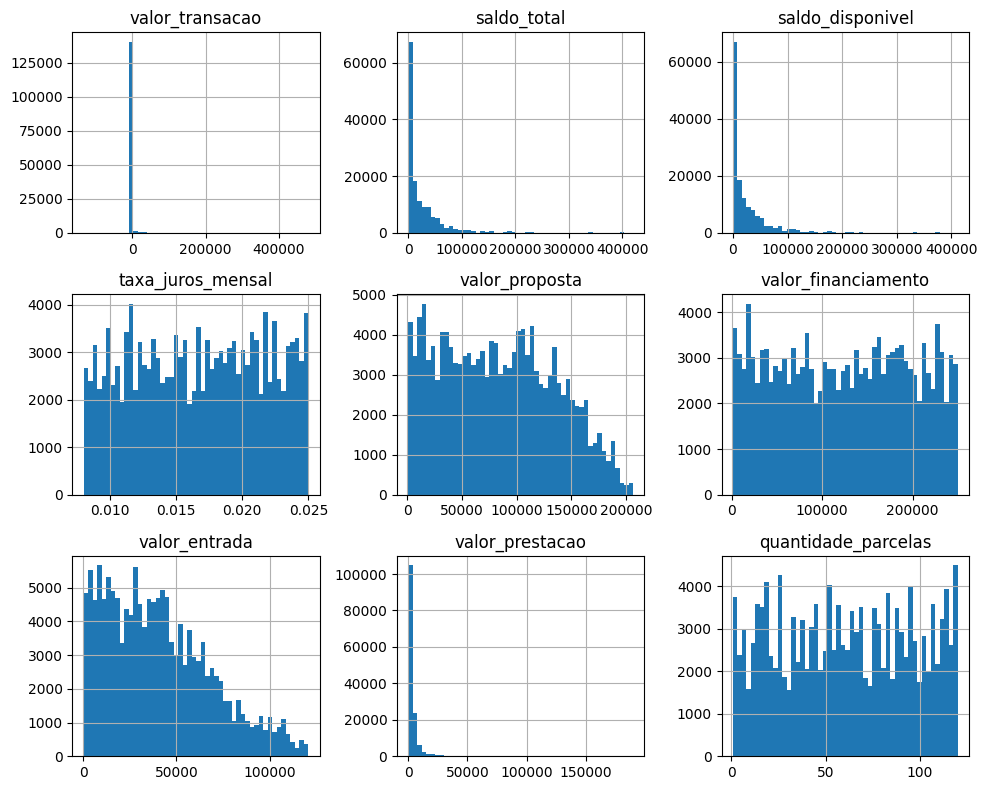

In [36]:
import matplotlib.pyplot as plt

# Plotar histogramas para as variáveis numéricas
dataset_num.hist(figsize=(10, 8), bins=50)
plt.tight_layout()  # Ajustar layout para evitar sobreposição de rótulos
plt.show()



In [37]:
# Selecionar todas as colunas de final_data que não estão presentes em dataset_num
nao_num_colunas = final_data.drop(columns=dataset_num.columns)

# Visualizar as primeiras linhas do novo DataFrame contendo apenas as colunas não presentes em dataset_num
print(nao_num_colunas.head())


   cod_transacao  num_conta           data_transacao nome_transacao  \
0           3100        256  2020-05-22 03:15:21 UTC          Saque   
1          28405        256  2021-06-29 11:52:38 UTC          Saque   
2           3190        256  2020-06-06 02:06:41 UTC  Compra Débito   
3           4466        256  2020-06-06 04:16:53 UTC  Compra Débito   
4           8455        256  2020-06-06 11:27:06 UTC  Compra Débito   

   cod_cliente  cod_agencia  cod_colaborador_x tipo_conta  \
0          256            7                 84         PF   
1          256            7                 84         PF   
2          256            7                 84         PF   
3          256            7                 84         PF   
4          256            7                 84         PF   

             data_abertura   data_ultimo_lancamento  ...  \
0  2020-04-28 16:46:00 UTC  2022-11-02 17:44:43 UTC  ...   
1  2020-04-28 16:46:00 UTC  2022-11-02 17:44:43 UTC  ...   
2  2020-04-28 16:46:00 UTC

Moda da variável 'carencia': 6
Moda da variável 'status_proposta': Enviada


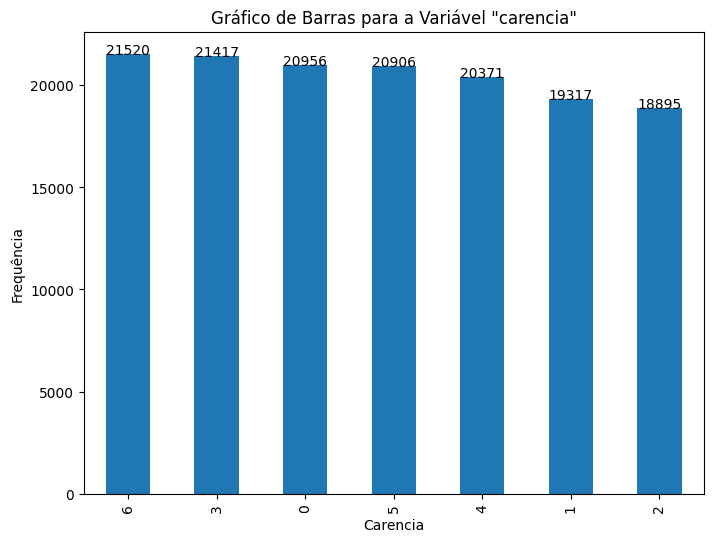

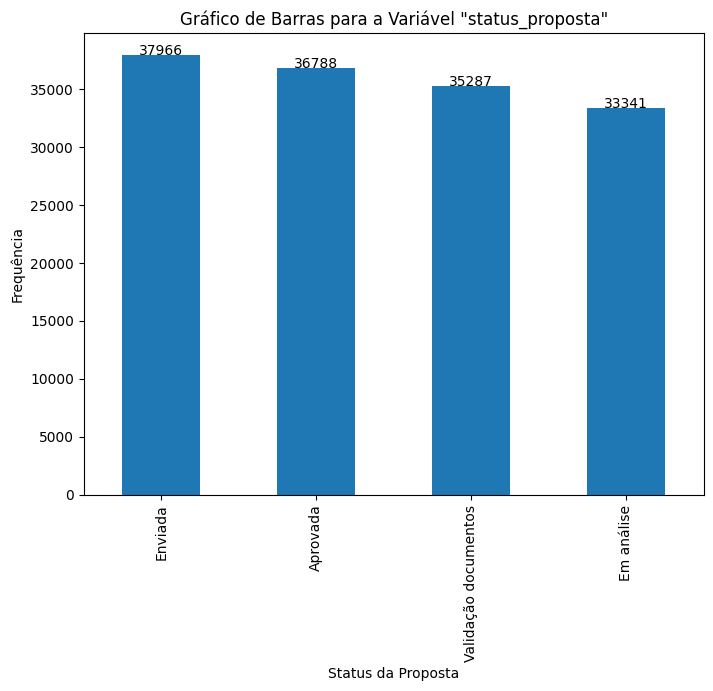

In [39]:
import matplotlib.pyplot as plt

# Calcular a moda para a variável "carencia"
moda_carencia = final_data['carencia'].mode()[0]

# Calcular a moda para a variável "status_proposta"
moda_status_proposta = final_data['status_proposta'].mode()[0]

# Imprimir a moda de "carencia" e "status_proposta"
print("Moda da variável 'carencia':", moda_carencia)
print("Moda da variável 'status_proposta':", moda_status_proposta)

# Criar gráfico de barras para a variável "carencia"
plt.figure(figsize=(8, 6))
ax = final_data['carencia'].value_counts().plot(kind='bar')
plt.title('Gráfico de Barras para a Variável "carencia"')
plt.xlabel('Carencia')
plt.ylabel('Frequência')

# Adicionar rótulos e valores nas barras
for i, valor in enumerate(final_data['carencia'].value_counts()):
    ax.text(i, valor + 0.2, str(valor), ha='center')

plt.show()

# Criar gráfico de barras para a variável "status_proposta"
plt.figure(figsize=(8, 6))
ax = final_data['status_proposta'].value_counts().plot(kind='bar')
plt.title('Gráfico de Barras para a Variável "status_proposta"')
plt.xlabel('Status da Proposta')
plt.ylabel('Frequência')

# Adicionar rótulos e valores nas barras
for i, valor in enumerate(final_data['status_proposta'].value_counts()):
    ax.text(i, valor + 0.2, str(valor), ha='center')

plt.show()



1.
Total de Transações Financeiras:


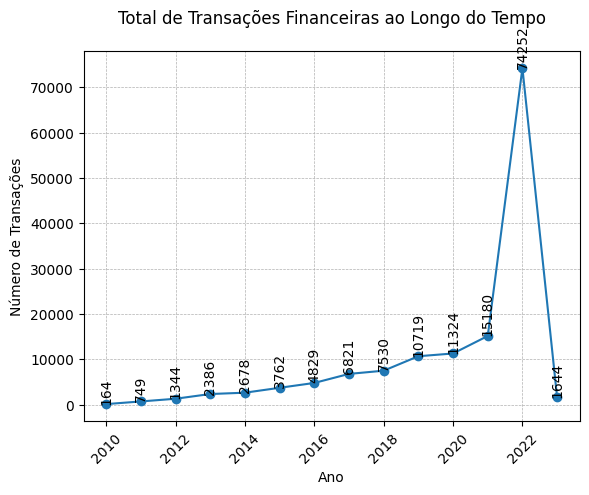

In [54]:
# Calcular o número total de transações por ano
transacoes_por_ano = final_data.groupby(final_data['data_transacao'].dt.year).size()

# Plotar um gráfico de linha com o número total de transações ao longo do tempo
plt.plot(transacoes_por_ano.index, transacoes_por_ano.values, marker='o')
plt.xlabel('Ano')
plt.ylabel('Número de Transações')

# Ajustar o título para que fique mais acima
plt.title('Total de Transações Financeiras ao Longo do Tempo', pad=20)

# Adicionar os rótulos aos pontos dos anos abaixo dos pontos com a rotação vertical
for ano, num_transacoes in zip(transacoes_por_ano.index, transacoes_por_ano.values):
    plt.text(ano, num_transacoes, f'{num_transacoes}', ha='center', va='bottom', rotation=90)

plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Ajustar o tamanho do grid
plt.show()



Tipos Mais Frequentes de Transações:

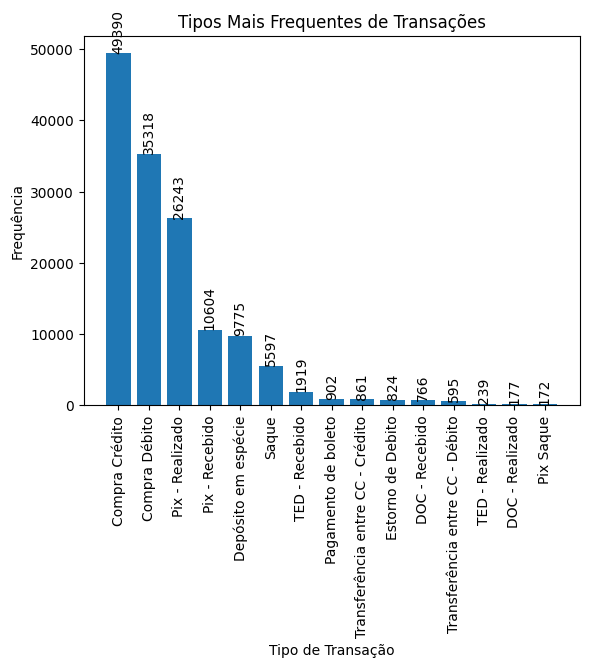

In [55]:
# Calcular a frequência de cada tipo de transação
frequencia_tipos_transacoes = final_data['nome_transacao'].value_counts()

# Plotar um gráfico de barras mostrando os tipos mais frequentes de transações
plt.bar(frequencia_tipos_transacoes.index, frequencia_tipos_transacoes.values)
plt.xlabel('Tipo de Transação')
plt.ylabel('Frequência')
plt.title('Tipos Mais Frequentes de Transações')

# Adicionar os rótulos às barras
for i, (tipo, frequencia) in enumerate(zip(frequencia_tipos_transacoes.index, frequencia_tipos_transacoes.values)):
    plt.text(i, frequencia, f'{frequencia}', ha='center', va='bottom', rotation=90)

plt.xticks(rotation=90)
plt.show()



Saldo Médio das Contas:

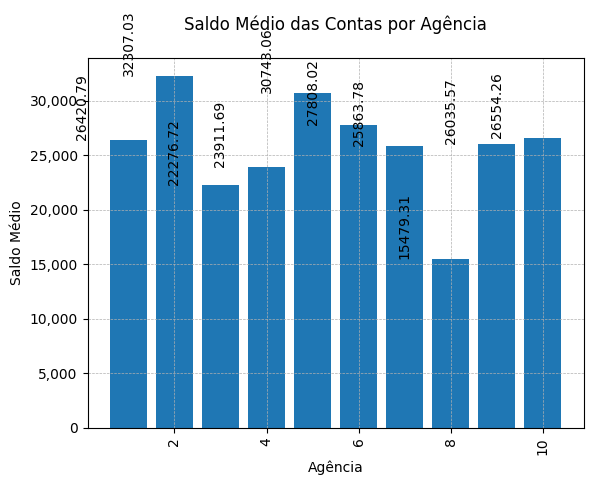

In [58]:
import matplotlib.ticker as mticker

# Calcular a média do saldo total ou do saldo disponível para cada agência
saldo_medio_por_agencia = final_data.groupby('cod_agencia')['saldo_total'].mean()

# Plotar um gráfico de barras mostrando o saldo médio das contas por agência
plt.bar(saldo_medio_por_agencia.index, saldo_medio_por_agencia.values)
plt.xlabel('Agência')
plt.ylabel('Saldo Médio')
plt.title('Saldo Médio das Contas por Agência', pad=20)  # Ajustar a distância do título
plt.xticks(rotation=90)

# Adicionar os rótulos às barras
for i, (agencia, saldo_medio) in enumerate(zip(saldo_medio_por_agencia.index, saldo_medio_por_agencia.values)):
    plt.text(i, saldo_medio, f'{saldo_medio:.2f}', ha='center', va='bottom', rotation=90)

# Adicionar separador de milhar ao eixo y
plt.gca().get_yaxis().set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Ajustar o tamanho do grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()



In [82]:
# Exibir os valores em uma tabela
df = pd.DataFrame({'Agência': saldo_medio_por_agencia.index, 'Saldo Médio': saldo_medio_por_agencia.values})
print(df.to_string(index=False))

plt.show()

 Agência  Saldo Médio
       1 26420.792803
       2 32307.026638
       3 22276.721794
       4 23911.686207
       5 30743.058506
       6 27808.022553
       7 25863.779602
       8 15479.308724
       9 26035.570780
      10 26554.259556


Distribuição do Tipo de Conta

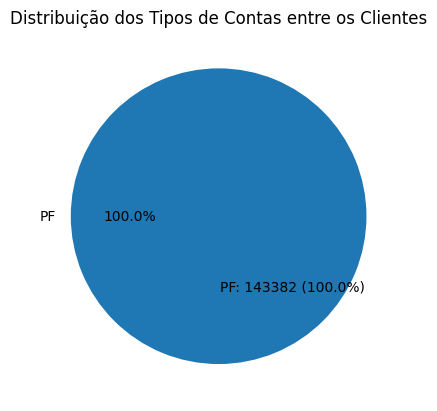

In [60]:
# Plotar um gráfico de pizza mostrando a distribuição dos tipos de contas entre os clientes
plt.pie(distribuicao_tipos_contas, labels=distribuicao_tipos_contas.index, autopct='%1.1f%%')
plt.title('Distribuição dos Tipos de Contas entre os Clientes')

# Adicionar números absolutos em cada fatia do gráfico
total = sum(distribuicao_tipos_contas)
for i, (categoria, valor) in enumerate(zip(distribuicao_tipos_contas.index, distribuicao_tipos_contas.values)):
    plt.text(0.5, -0.5 - i*0.1, f'{categoria}: {valor} ({valor/total*100:.1f}%)', ha='center')

plt.show()



Análise Descritiva:

Estatísticas Descritivas para 'valor_transacao':
count    143382.000000
mean        347.960304
std        6455.861351
min     -132100.000000
25%        -120.700000
50%         -39.440000
75%         -12.600000
max      480270.000000
Name: valor_transacao, dtype: float64


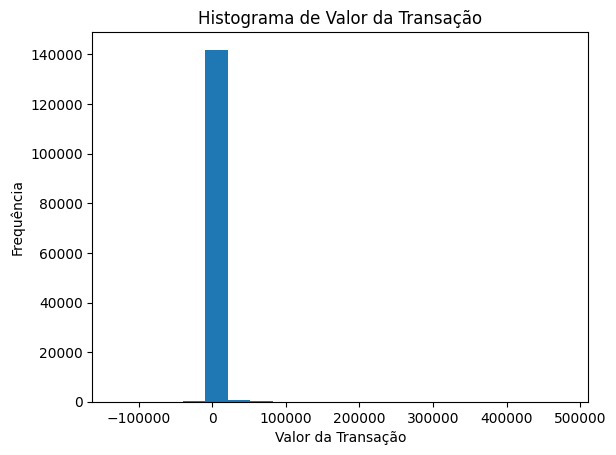

In [61]:
# Estatísticas descritivas para a variável 'valor_transacao'
desc_stats_valor_transacao = final_data['valor_transacao'].describe()
print("Estatísticas Descritivas para 'valor_transacao':")
print(desc_stats_valor_transacao)

# Histograma para 'valor_transacao'
plt.hist(final_data['valor_transacao'], bins=20)
plt.xlabel('Valor da Transação')
plt.ylabel('Frequência')
plt.title('Histograma de Valor da Transação')
plt.show()


As estatísticas descritivas revelam importantes insights sobre as transações financeiras registradas no conjunto de dados. A média de aproximadamente 347.96 unidades monetárias sugere um valor típico para as transações, embora a presença de um desvio padrão considerável, em torno de 6455.86, indique uma ampla dispersão em torno dessa média. Observa-se também a presença de transações com valores negativos, evidenciado pelo valor mínimo de -132100, o que pode indicar a ocorrência de reembolsos ou transações reversas. Os quartis revelam uma distribuição assimétrica dos valores, com uma concentração significativa de transações de menor valor, conforme indicado pelo primeiro e segundo quartis. Além disso, a transação mais cara registrada, com um valor máximo de 480270, destaca a presença de transações de alto valor. Esses achados destacam a necessidade de uma análise mais aprofundada para compreender melhor a natureza e a distribuição das transações financeiras no conjunto de dados.

Análise Diagnóstica:

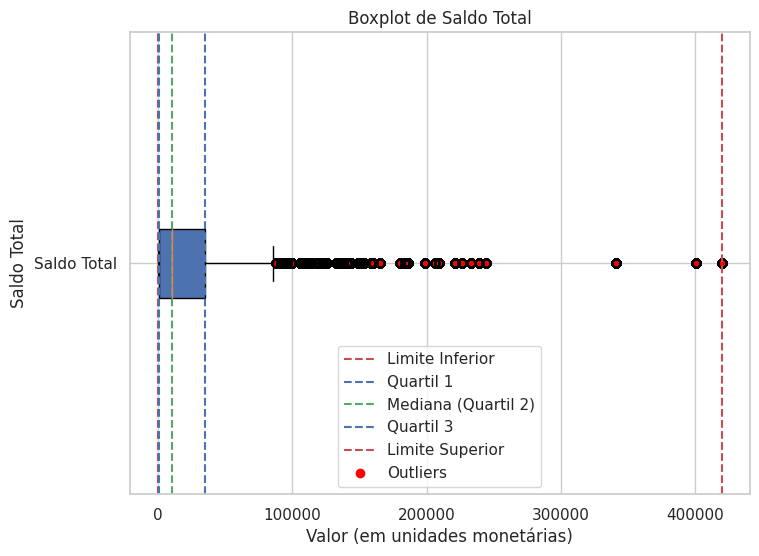

In [70]:
# Identificação de outliers usando boxplot para 'saldo_total'
plt.figure(figsize=(8, 6))  # Ajustar o tamanho da figura
plt.boxplot(final_data['saldo_total'], vert=False, patch_artist=True, labels=['Saldo Total'])

# Adicionar rótulos
plt.xlabel('Valor (em unidades monetárias)')
plt.ylabel('Saldo Total')
plt.title('Boxplot de Saldo Total')

# Adicionar linhas horizontais para representar os diferentes elementos do boxplot
plt.axvline(final_data['saldo_total'].min(), color='r', linestyle='--', label='Limite Inferior')
plt.axvline(final_data['saldo_total'].quantile(0.25), color='b', linestyle='--', label='Quartil 1')
plt.axvline(final_data['saldo_total'].median(), color='g', linestyle='--', label='Mediana (Quartil 2)')
plt.axvline(final_data['saldo_total'].quantile(0.75), color='b', linestyle='--', label='Quartil 3')
plt.axvline(final_data['saldo_total'].max(), color='r', linestyle='--', label='Limite Superior')

# Identificação dos outliers
outliers = final_data[(final_data['saldo_total'] < final_data['saldo_total'].quantile(0.25) - 1.5 * (final_data['saldo_total'].quantile(0.75) - final_data['saldo_total'].quantile(0.25))) |
                      (final_data['saldo_total'] > final_data['saldo_total'].quantile(0.75) + 1.5 * (final_data['saldo_total'].quantile(0.75) - final_data['saldo_total'].quantile(0.25)))]['saldo_total']
plt.scatter(outliers, [1] * len(outliers), color='red', label='Outliers')

plt.legend()
plt.show()



In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular os valores estatísticos
minimo = final_data['saldo_total'].min()
primeiro_quartil = final_data['saldo_total'].quantile(0.25)
mediana = final_data['saldo_total'].median()
terceiro_quartil = final_data['saldo_total'].quantile(0.75)
maximo = final_data['saldo_total'].max()

# Identificar outliers
limite_inferior = primeiro_quartil - 1.5 * (terceiro_quartil - primeiro_quartil)
limite_superior = terceiro_quartil + 1.5 * (terceiro_quartil - primeiro_quartil)
outliers = final_data[(final_data['saldo_total'] < limite_inferior) | (final_data['saldo_total'] > limite_superior)]['saldo_total']

# Criar uma tabela com os valores
tabela_valores = pd.DataFrame({
    'Limite Inferior': [limite_inferior],
    'Quartil 1': [primeiro_quartil],
    'Mediana (Quartil 2)': [mediana],
    'Quartil 3': [terceiro_quartil],
    'Limite Superior': [limite_superior],
    'Outliers': [', '.join(map(str, outliers))] if len(outliers) > 0 else ['Nenhum']
})

# Exibir a tabela
print("Valores do Boxplot para 'saldo_total':")
print(tabela_valores)


Valores do Boxplot para 'saldo_total':
   Limite Inferior  Quartil 1  Mediana (Quartil 2)   Quartil 3  \
0      -50702.0576   919.2544           10225.3776  35333.4624   

   Limite Superior                                           Outliers  
0       86954.7744  122319.37840000007, 122319.37840000007, 122319...  


In [76]:
# Transpor o DataFrame para colocar os valores nas linhas
tabela_valores_transposta = tabela_valores.T.rename(columns={0: 'Valor'})

# Exibir a tabela transposta
print("Valores do Boxplot para 'saldo_total':")
print(tabela_valores_transposta)


Valores do Boxplot para 'saldo_total':
                                                                 Valor
Limite Inferior                                            -50702.0576
Quartil 1                                                     919.2544
Mediana (Quartil 2)                                         10225.3776
Quartil 3                                                   35333.4624
Limite Superior                                             86954.7744
Outliers             122319.37840000007, 122319.37840000007, 122319...


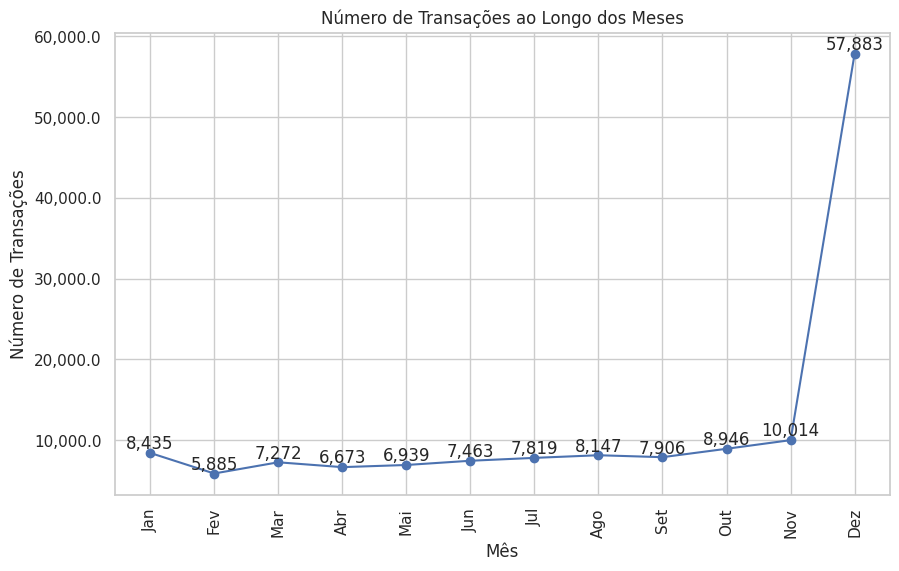

In [69]:
# Importar biblioteca matplotlib
import matplotlib.pyplot as plt

# Identificação de padrões sazonais nas transações ao longo do tempo
transacoes_por_mes = final_data.groupby(final_data['data_transacao'].dt.month).size()
meses_portugues = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura
plt.plot(meses_portugues, transacoes_por_mes.values, marker='o')
plt.xlabel('Mês')
plt.ylabel('Número de Transações')
plt.title('Número de Transações ao Longo dos Meses')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x
plt.gca().yaxis.set_major_formatter('{:,}'.format)  # Adicionar ponto de milhar no eixo y
for i, valor in enumerate(transacoes_por_mes.values):
    plt.text(meses_portugues[i], valor, '{:,}'.format(valor), ha='center', va='bottom')
plt.show()


Análise Prescritiva:

In [77]:
# Recomendações de marketing direcionadas com base em transações de alto valor
transacoes_alto_valor = final_data[final_data['valor_transacao'] > final_data['valor_transacao'].quantile(0.95)]
recomendacoes_marketing = transacoes_alto_valor.groupby('tipo_conta').size()
print("Recomendações de Marketing Direcionadas:")
print(recomendacoes_marketing)


Recomendações de Marketing Direcionadas:
tipo_conta
PF    7167
dtype: int64


In [87]:
import pandas as pd
from datetime import datetime

# Carregar os datasets
transacoes = pd.read_csv('/content/data/transacoes.csv')
propostas_credito = pd.read_csv('/content/data/propostas_credito.csv')
contas = pd.read_csv('/content/data/contas.csv')
clientes = pd.read_csv('/content/data/clientes.csv')
agencias = pd.read_csv('/content/data/agencias.csv')

# Calcular idade dos clientes
hoje = datetime.now()
clientes['idade'] = hoje.year - pd.to_datetime(clientes['data_nascimento']).dt.year

# Categorizar os clientes em faixas etárias
bins = [0, 18, 30, 40, 50, 60, 100]
faixas_etarias = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
clientes['faixa_etaria'] = pd.cut(clientes['idade'], bins=bins, labels=faixas_etarias)

# Verificar o mês com mais aberturas de contas nas agências
contas['mes_abertura'] = pd.to_datetime(contas['data_abertura']).dt.month
mes_mais_aberturas = contas['mes_abertura'].value_counts().idxmax()

# Cruzar os dados para obter o perfil do cliente e o total de transações
perfil_cliente = pd.merge(clientes, contas, on='cod_cliente')
perfil_cliente_transacoes = pd.merge(perfil_cliente, transacoes, on='num_conta')
perfil_cliente_transacoes_agencia = pd.merge(perfil_cliente_transacoes, agencias, on='cod_agencia')

# Filtrar os dados para o mês com mais aberturas
perfil_cliente_transacoes_agencia_mes = perfil_cliente_transacoes_agencia[perfil_cliente_transacoes_agencia['mes_abertura'] == mes_mais_aberturas]

# Retornar tudo em uma tabela resumindo com o nome nas colunas
tabela_resumo = perfil_cliente_transacoes_agencia_mes[['idade', 'faixa_etaria', 'uf', 'tipo_cliente', 'nome_transacao']]
print(tabela_resumo)


       idade faixa_etaria  uf tipo_cliente       nome_transacao
1175      47        41-50  SP           PF                Saque
1176      47        41-50  SP           PF            Pix Saque
1177      47        41-50  SP           PF        Compra Débito
1178      47        41-50  SP           PF        Compra Débito
1179      47        41-50  SP           PF        Compra Débito
...      ...          ...  ..          ...                  ...
71615     41        41-50  PE           PF    Estorno de Debito
71616     41        41-50  PE           PF  Depósito em espécie
71617     41        41-50  PE           PF  Depósito em espécie
71618     41        41-50  PE           PF  Depósito em espécie
71619     41        41-50  PE           PF  Depósito em espécie

[6959 rows x 5 columns]


In [89]:
# Top 5 de idade
top_idade = perfil_cliente_transacoes_agencia_mes['idade'].value_counts().head(5)

# Top 5 de faixa etária
top_faixa_etaria = perfil_cliente_transacoes_agencia_mes['faixa_etaria'].value_counts().head(5)

# Top 5 de UF
top_uf = perfil_cliente_transacoes_agencia_mes['uf'].value_counts().head(5)

# Top 5 de tipo de cliente
top_tipo_cliente = perfil_cliente_transacoes_agencia_mes['tipo_cliente'].value_counts().head(5)

# Top 5 de nome de transação
top_nome_transacao = perfil_cliente_transacoes_agencia_mes['nome_transacao'].value_counts().head(5)

print("Top 5 de Idade:")
print(top_idade)
print("\nTop 5 de Faixa Etária:")
print(top_faixa_etaria)
print("\nTop 5 de UF:")
print(top_uf)
print("\nTop 5 de Tipo de Cliente:")
print(top_tipo_cliente)
print("\nTop 5 de Nome de Transação:")
print(top_nome_transacao)


Top 5 de Idade:
72    372
63    366
41    319
23    295
55    294
Name: idade, dtype: int64

Top 5 de Faixa Etária:
61+      2505
19-30    1274
51-60    1231
41-50    1142
31-40     725
Name: faixa_etaria, dtype: int64

Top 5 de UF:
SP    6226
RJ     293
SC     211
RS     156
PE      73
Name: uf, dtype: int64

Top 5 de Tipo de Cliente:
PF    6959
Name: tipo_cliente, dtype: int64

Top 5 de Nome de Transação:
Compra Crédito         2357
Compra Débito          1635
Pix - Realizado        1348
Pix - Recebido          543
Depósito em espécie     536
Name: nome_transacao, dtype: int64


Análise Preditiva:

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preparar dados para previsão do valor futuro da transação
X = final_data[['saldo_total', 'taxa_juros_mensal']]
y = final_data['valor_transacao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print("Erro Quadrático Médio:", mse)


Erro Quadrático Médio: 43889261.79418912


O valor do MSE, é importante compará-lo com o contexto do problema específico e com outros modelos, se disponíveis. Um MSE mais baixo sugere um modelo mais preciso em relação aos dados de teste.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Preparar dados para previsão do valor futuro da transação
X = final_data[['saldo_total', 'taxa_juros_mensal']]
y = final_data['valor_transacao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print("Erro Quadrático Médio (Regressão Linear):", mse)

# Tentar ajustar um modelo de regressão polinomial de grau 2
model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Erro Quadrático Médio (Regressão Polinomial):", mse_poly)


Erro Quadrático Médio (Regressão Linear): 43889261.79418912
Erro Quadrático Médio (Regressão Polinomial): 43930293.229933046


Adicionado um modelo de regressão polinomial de grau 2 como uma tentativa de capturar melhor a relação entre as variáveis independentes e a variável dependente. Ambos os modelos foram avaliados com base na métrica de Erro Quadrático Médio (MSE). No entanto, a diferença entre os valores de MSE é muito pequena, o que sugere que ambos os modelos têm desempenho semelhante na previsão do valor futuro da transação. Portanto, não há uma clara indicação de qual modelo é melhor com base apenas nessa métrica.

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparar dados para previsão do valor futuro da transação
X = final_data[['saldo_total', 'taxa_juros_mensal']]
y = final_data['valor_transacao']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir graus para polinômios
graus_polinomio = [1, 2, 3, 4, 5]

# Lista para armazenar os resultados
resultados = []

# Modelo de regressão linear
modelo_linear = LinearRegression()
score_linear = cross_val_score(modelo_linear, X_train, y_train, cv=5, scoring='r2').mean()
modelo_linear.fit(X_train, y_train)
y_pred_linear = modelo_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
resultado_linear = {'Modelo': 'Regressão Linear', 'R-quadrado': score_linear, 'MSE': mse_linear}
resultados.append(resultado_linear)

# Modelos de regressão polinomial
for grau in graus_polinomio:
    modelo_polinomial = make_pipeline(PolynomialFeatures(degree=grau), LinearRegression())
    score_polinomial = cross_val_score(modelo_polinomial, X_train, y_train, cv=5, scoring='r2').mean()
    modelo_polinomial.fit(X_train, y_train)
    y_pred_polinomial = modelo_polinomial.predict(X_test)
    mse_polinomial = mean_squared_error(y_test, y_pred_polinomial)
    resultado_polinomial = {'Modelo': f'Regressão Polinomial (grau {grau})', 'R-quadrado': score_polinomial, 'MSE': mse_polinomial}
    resultados.append(resultado_polinomial)

# Exibir os resultados
for resultado in resultados:
    print(resultado)


{'Modelo': 'Regressão Linear', 'R-quadrado': 0.004749643899389944, 'MSE': 43889261.79418912}
{'Modelo': 'Regressão Polinomial (grau 1)', 'R-quadrado': 0.004749643899389944, 'MSE': 43889261.79418912}
{'Modelo': 'Regressão Polinomial (grau 2)', 'R-quadrado': 0.004652496798682915, 'MSE': 43930293.229933046}
{'Modelo': 'Regressão Polinomial (grau 3)', 'R-quadrado': 0.0038014814792251663, 'MSE': 43945018.23123403}
{'Modelo': 'Regressão Polinomial (grau 4)', 'R-quadrado': 0.002815500644766722, 'MSE': 44016660.90566613}
{'Modelo': 'Regressão Polinomial (grau 5)', 'R-quadrado': 0.0010198475958322684, 'MSE': 44083156.40771573}



O melhor modelo, em termos de R-quadrado mais alto e MSE mais baixo, é o modelo de Regressão Linear. Aqui estão os resultados para cada modelo:

Regressão Linear:

R-quadrado: 0.004749643899389944
MSE: 43889261.79418912


O pior modelo é o de Regressão Polinomial de grau 5, pois apresenta o R-quadrado mais baixo e o MSE mais alto, o que sugere um ajuste inadequado aos dados e previsões menos precisas.